## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Project Overview**

In this project, we utilized data cleaning, analysis, and visualization to investigate trends in airplane accidents from 1963-2023 and generate insights.

**Business Problem**

Your company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In order to load the dataset and start on analysising the data required pandas, numpy, matplotlib and seaborn are imported 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset to dataframe df

In [2]:
df = pd.read_csv('data/Aviation_data.csv', encoding = 'ISO-8859-1', low_memory = False)

**Conduct premilinary analysis to understand data**

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.shape

(90348, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Dataset contains 90348 records with 31 parameters in columns. As per above table Number.of.Engines,Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries and Total.Uninjured are in float data type and all other columns are in object data type. There are many missing values in each and every column leads to the requirement of data cleaning activity.

**Data Cleaning**

The below table shows no of missing values in each and every column

In [6]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

As our main focus is to determine make and model with lowest risk for purchase decision, the rows with missing values of make have dropped from the dataframe. 

In [7]:
df_clean = df.dropna(subset=['Make'])

In [8]:
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54466
Longitude                 54475
Airport.Code              38591
Airport.Name              36051
Injury.Severity             983
Aircraft.damage            3176
Aircraft.Category         56551
Registration.Number        1279
Make                          0
Model                        49
Amateur.Built               100
Number.of.Engines          6035
Engine.Type                7026
FAR.Description           56854
Schedule                  76283
Purpose.of.flight          6150
Air.carrier               72202
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          4454
Broad.phase.of.flight     27113
Report.Status              6349
Publication.Date          15227
dtype: i

Further Analyse the make column

In [9]:
df_clean['Make'].value_counts()

Cessna                22227
Piper                 12029
CESSNA                 4922
Beech                  4330
PIPER                  2841
                      ...  
Robert D. Campbell        1
Menees                    1
Grieme                    1
Wesley                    1
Emigh Aircraft            1
Name: Make, Length: 8237, dtype: int64

It was evident that same name of make appear in different forms and next few steps clensed the make column.

In [10]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].str.strip().str.upper()

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [12]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
 "CESNA": "CESSNA",
    "CESSNA AIRCRAFT": "CESSNA",
    "CESSNA AIRCRAFT CO": "CESSNA",
    "CESSNA AIRCRAFT CO.": "CESSNA",
    "CESSNA AIRCRAFT COMPANY": "CESSNA",
    "CESSNA ECTOR":"CESSNA",
    "CESSNA REEMS":"CESSNA",
    "CESSNA REIMS":"CESSNA",
    "CESSNA ROBERTSON":"CESSNA",
    "CESSNA SKYHAWK II":"CESSNA",
    "CESSNA SOLOY":"CESSNA",
    "CESSNA WREN":"CESSNA",
    "CESSNA/AIR REPAIR INC":"CESSNA",
    "CESSNA/WEAVER":"CESSNA"})

In [13]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"PIPER / LAUDEMAN":"PIPER",
"PIPER AEROSTAR":"PIPER",
"PIPER AIRCRAFT":"PIPER",
"PIPER AIRCRAFT CORPORATION":"PIPER",
"PIPER AIRCRAFT INC":"PIPER",
"PIPER AIRCRAFT, INC.":"PIPER",
"PIPER CUB CRAFTERS":"PIPER",
"PIPER PAWNEE":"PIPER",
"PIPER-AEROSTAR":"PIPER",
"PIPER-HARRIS":"PIPER",
"PIPER/CUB CRAFTERS":"PIPER",
"PIPER/STEVENS":"PIPER",
"PIPER/WALLY'S FLYERS INC":"PIPER"})

In [14]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BOEING (STEARMAN)":"BOEING",
"BOEING - CANADA (DE HAVILLAND)":"BOEING",
"BOEING 777-306ER":"BOEING",
"BOEING COMMERCIAL AIRPLANE GRO":"BOEING",
"BOEING COMPANY":"BOEING",
"BOEING COMPANY, LONG BEACH DIV":"BOEING",
"BOEING HELICOPTERS DIV.":"BOEING",
"BOEING OF CANADA/DEHAV DIV":"BOEING",
"BOEING STEARMAN":"BOEING",
"BOEING VERTOL":"BOEING",
"BOEING-BROWN":"BOEING",
"BOEING-STEARMAN":"BOEING",
"BOEING-VERTOL":"BOEING"})

In [15]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"ROBINSON HELICOPTER":"ROBINSON",
"ROBINSON HELICOPTER CO":"ROBINSON",
"ROBINSON HELICOPTER CO INC":"ROBINSON",
"ROBINSON HELICOPTER CO.":"ROBINSON",
"ROBINSON HELICOPTER COMPANY":"ROBINSON",
"ROBINSON HELICOPTERS":"ROBINSON",
"ROBINSON MICHAEL E":"ROBINSON",
"ROBINSON STEWART J":"ROBINSON"})

In [16]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BEECH AIRCRAFT":"BEECH",
"BEECH AIRCRAFT CO.":"BEECH",
"BEECH AIRCRAFT CORP":"BEECH",
"BEECH AIRCRAFT CORPORATION":"BEECH",
"BEECHCRAFT":"BEECH",
"BEECHCRAFT CORPORATION":"BEECH",
"BEECHER":"BEECH"})

In [17]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"MCDONNELL DOUGLAS CORPORATION":"MCDONALD DOUGLAS",
    "MCDONNELL-DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS AIRCRAFT CO":"MCDONALD DOUGLAS"
})

In [18]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"AIRBUS INDUSTRIE":"AIRBUS",
})

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
#Sanity Check
df_clean['Make'].value_counts()

CESSNA                               27213
PIPER                                14934
BEECH                                 5413
BOEING                                2824
BELL                                  2722
ROBINSON                              1682
MOONEY                                1334
GRUMMAN                               1172
BELLANCA                              1045
HUGHES                                 932
SCHWEIZER                              773
AIR TRACTOR                            691
AERONCA                                636
MCDONALD DOUGLAS                       619
MAULE                                  589
CHAMPION                               519
AIRBUS                                 455
STINSON                                439
AERO COMMANDER                         429
DE HAVILLAND                           422
LUSCOMBE                               414
AEROSPATIALE                           388
TAYLORCRAFT                            383
NORTH AMERI

In [21]:
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54466
Longitude                 54475
Airport.Code              38591
Airport.Name              36051
Injury.Severity             983
Aircraft.damage            3176
Aircraft.Category         56551
Registration.Number        1279
Make                          0
Model                        49
Amateur.Built               100
Number.of.Engines          6035
Engine.Type                7026
FAR.Description           56854
Schedule                  76283
Purpose.of.flight          6150
Air.carrier               72202
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          4454
Broad.phase.of.flight     27113
Report.Status              6349
Publication.Date          15227
dtype: i

It is observed that there are 56551 missing values in Aircraft.Category column. Composition of the column as follows.

In [22]:
df_clean['Aircraft.Category'].value_counts()

Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

We have observed the missing values in the 'Aircraft.Category' column. It was observed that for same make and model for some records correct tagging is given and for some left as blanks. Therefore need to clense the Aircraft.Category column by using the available tags.

For example CESSNA 180 some have tagged as "Airplane" and some have left as blank. Intention is to fill the blanks as "Airplane" considering the tag available

In [23]:
df_clean.loc[(df_clean['Make'] == 'CESSNA')&(df_clean['Model'] == '180')][['Make','Model','Aircraft.Category']]

,Make,Model,Aircraft.Category
6,CESSNA,180,NaN
17,CESSNA,180,Airplane
77,CESSNA,180,Airplane
248,CESSNA,180,Airplane
356,CESSNA,180,Airplane
393,CESSNA,180,Airplane
530,CESSNA,180,Airplane
715,CESSNA,180,Airplane
730,CESSNA,180,Airplane
823,CESSNA,180,Airplane


As our focus is on "Airplane" getting the already tagged as "Airplane" and get the unique values of Make-Model to a list. In order to do this getting a seperate column combining the "Make" and "Model".

In [24]:
df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']

<ipython-input-24-5af32d7e7560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']


In [25]:
List_Make = df_clean.loc[df_clean['Aircraft.Category'] =='Airplane']
List_Make = List_Make['Make_Model'].unique()

Replace the blanks in Aircraft.Category column as "Airplane" condiering the unique list already tagged as "Airplane" 

In [26]:
mask = (df_clean['Aircraft.Category'].isnull()) & (df_clean['Make_Model'].isin(List_Make))
df_clean.loc[mask, 'Aircraft.Category'] = 'Airplane'

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
df_clean['Aircraft.Category'].value_counts()

Airplane             68076
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [28]:
#Sanity Check
df_clean.loc[(df_clean['Make'] == 'CESSNA')&(df_clean['Model'] == '180')][['Make','Model','Aircraft.Category']]

,Make,Model,Aircraft.Category
6,CESSNA,180,Airplane
17,CESSNA,180,Airplane
77,CESSNA,180,Airplane
248,CESSNA,180,Airplane
356,CESSNA,180,Airplane
393,CESSNA,180,Airplane
530,CESSNA,180,Airplane
715,CESSNA,180,Airplane
730,CESSNA,180,Airplane
823,CESSNA,180,Airplane


As our focus is on Airplanes filter the dataframe considering "Airplanes"

In [29]:
df_clean_aircraft = df_clean.loc[df_clean['Aircraft.Category']=='Airplane',:]

In [30]:
df_clean_aircraft.shape

(68076, 32)

In [31]:
df_clean_aircraft['Datetime'] = pd.to_datetime(df_clean_aircraft['Event.Date'])
df_clean_aircraft['Year_of_Incident']=df_clean_aircraft['Datetime'].dt.year

<ipython-input-31-02561812a85f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_aircraft['Datetime'] = pd.to_datetime(df_clean_aircraft['Event.Date'])
<ipython-input-31-02561812a85f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_aircraft['Year_of_Incident']=df_clean_aircraft['Datetime'].dt.year


As focus on the models dataframe filtered for last 20 years as old data obsolete to analyse.

In [32]:
df_clean_aircraft= df_clean_aircraft.loc[df_clean_aircraft['Year_of_Incident']>2001]

Run by varibles to get general understading

In [33]:
df_clean_aircraft['Total.Minor.Injuries'].isna().sum()

7012

In [34]:
df_clean_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29764 entries, 51959 to 90347
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                29764 non-null  object        
 1   Investigation.Type      29764 non-null  object        
 2   Accident.Number         29764 non-null  object        
 3   Event.Date              29764 non-null  object        
 4   Location                29758 non-null  object        
 5   Country                 29762 non-null  object        
 6   Latitude                26976 non-null  object        
 7   Longitude               26967 non-null  object        
 8   Airport.Code            19409 non-null  object        
 9   Airport.Name            19555 non-null  object        
 10  Injury.Severity         28863 non-null  object        
 11  Aircraft.damage         28196 non-null  object        
 12  Aircraft.Category       29764 non-null  ob

**Analysis of Accident.Number column**

In [35]:
df_clean_aircraft['Accident.Number'].nunique()

29741

Identified duplicates of accident number and more investigation on it.

In [36]:
#Identify duplicate values in accident number
df_clean_aircraft.duplicated() == True
df_clean_aircraft[df_clean_aircraft[['Accident.Number']].duplicated() == True]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Datetime,Year_of_Incident
88568,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,0.0,0.0,4.0,VMC,NaN,The pilot of the Cessna 150Âs failure to avoi...,NaN,CESSNA 150G,2022-01-08,2022
88599,20220309104747,Incident,DCA22WA089,2022-01-15,"Sukkur, OF",Pakistan,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BOEING 737,2022-01-15,2022
88620,20220801105632,Incident,DCA22WA167,2022-01-22,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BOEING 737-800,2022-01-22,2022
88695,20220212104630,Accident,ERA22LA119,2022-02-11,"Naples, FL",United States,026930N,0081464W,APF,NAPLES MUNI,...,0.0,0.0,2.0,VMC,NaN,The biplane pilotÂs inadequate visual lookout...,22-09-2022,GREAT LAKES 2T-1A-2,2022-02-11,2022
88856,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,...,0.0,0.0,2.0,VMC,NaN,The failure of the pilot of the second aircraf...,05-07-2022,CESSNA 208B,2022-03-18,2022
88947,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,0.0,0.0,8.0,VMC,NaN,The student pilotÂs failure to maintain suffi...,20-07-2022,CESSNA 172G,2022-04-02,2022
89300,20220614105258,Incident,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BOEING 777,2022-06-05,2022
89318,20220608105217,Accident,WPR22LA201,2022-06-07,"Hawthorne, CA",United States,335520N,0118203W,KHHR,Jack Northrop Field/Hawthorne,...,0.0,0.0,11.0,VMC,NaN,The multi-engine pilot's failure to maintain c...,02-12-2022,BOMBARDIER BD100 1A10,2022-06-07,2022
89384,20220623105317,Accident,DCA22LA135,2022-06-18,"New York, NY",United States,403833N,0734644W,KJFK,John F kennedy International,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,BOEING 777,2022-06-18,2022
89494,20220726105577,Incident,DCA22WA158,2022-07-02,"Barcelona,",Spain,411750N,0002442E,LEBL,Barcelona International Airpor,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BOEING 737,2022-07-02,2022


Filtering to one duplicate for better understanding

In [37]:
df_clean_aircraft[df_clean_aircraft['Accident.Number'] == "ERA22LA103"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Datetime,Year_of_Incident
88566,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,0.0,0.0,4.0,VMC,NaN,The pilot of the Cessna 150Âs failure to avoi...,NaN,CESSNA 172L,2022-01-08,2022
88568,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,0.0,0.0,4.0,VMC,NaN,The pilot of the Cessna 150Âs failure to avoi...,NaN,CESSNA 150G,2022-01-08,2022


It is identified that duplicates of accidents due to crashing of planes on each other. Therefore it was decided to continue with duplicates.

In order to anlyse the total survivors have taken a cumulative column with the summation of minor injuries, serious injuries and uninjured.

In [38]:
df_clean_aircraft['Total Survived'] = df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Serious.Injuries'] +df_clean_aircraft['Total.Uninjured']

**Analysis of No of Engines**

In [39]:
df_clean_aircraft['Number.of.Engines'].value_counts()

1.0    22410
2.0     3848
4.0       98
3.0       52
0.0        4
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

As observed above 0 is not a valid input. Therefore bar chart to be plotted without 0 values

In [40]:
df_filtered = df_clean_aircraft[df_clean_aircraft['Number.of.Engines'] > 0]

In [41]:
df_filtered['Number.of.Engines'].value_counts()

1.0    22410
2.0     3848
4.0       98
3.0       52
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

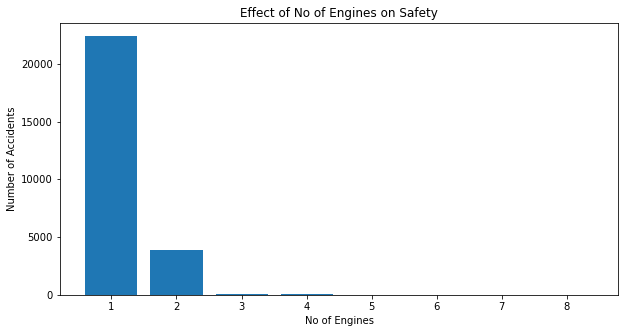

In [42]:
x = df_filtered['Number.of.Engines'].value_counts().sort_index().index
y = df_filtered['Number.of.Engines'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of No of Engines on Safety')
ax.set_xlabel('No of Engines')
ax.set_ylabel('Number of Accidents');

It is clearly evident that as no of engine increases propensity to decreases no of accidents. Next step is to identify the flights with more than 2 engines.

In [43]:
flight_eng = df_filtered.loc[df_filtered['Number.of.Engines']>2][['Make','Number.of.Engines']]

In [44]:
flight_eng['Make'].nunique()

17

In [45]:
flight_eng['Make'].value_counts()

BOEING                            85
MCDONALD DOUGLAS                  30
DOUGLAS                            9
LOCKHEED                           7
DASSAULT                           4
BAE                                3
DASSAULT-BREGUET                   3
AIRBUS                             2
JOBY AERO INC                      1
PYKA INC                           1
BAE SYSTEMS (OPERATIONS) LIMIT     1
BRITISH AEROSPACE CIVIL AIRCR      1
KITTY HAWK                         1
ANTONOV                            1
TUPOLEV                            1
FACEBOOK UK LTD                    1
BRITISH AEROSPACE                  1
Name: Make, dtype: int64

There are 25 unique type of models having more than 2 engines. 
As per our online research we have identified companies are moving away from 4 engines due to difficulty of maintenance. Therefore our focus is to select air craft with 2,3 engines but online research suggest to go with 2 engines as 3 engines are less efficient than 2 engines. This is mainly due to operating cost of it.

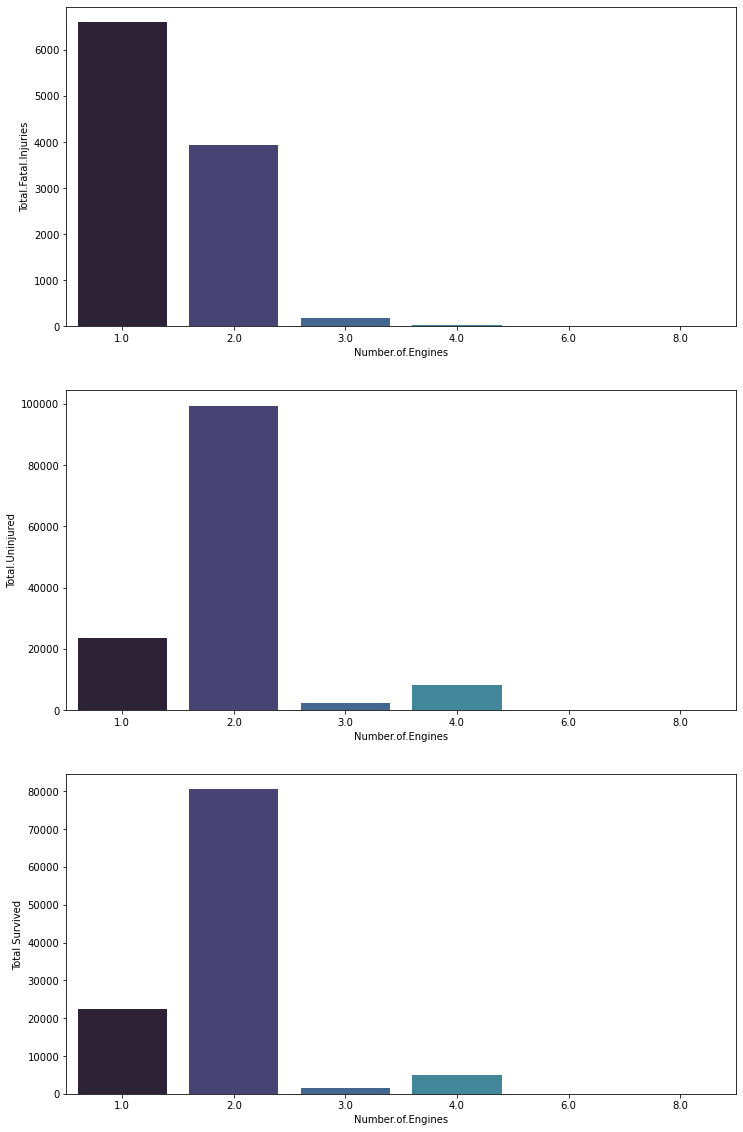

In [46]:
factor_numEngine=  df_filtered.groupby("Number.of.Engines").sum().reset_index()
factor_numEngine

f, axes=plt.subplots(3,1 , figsize= (12,20))
sns.barplot(x = 'Number.of.Engines',y='Total.Fatal.Injuries' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[0])
sns.barplot(x = 'Number.of.Engines',y='Total.Uninjured' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[1])
sns.barplot(x = 'Number.of.Engines',y='Total Survived' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[2]);

It is observed that with two engines the survival count is highest and justifiable to look for aircraft with two engines.

**Analysis of Engine Type**

In [47]:
df_clean_aircraft['Engine.Type'].value_counts()

Reciprocating      21899
Turbo Prop          1566
Turbo Fan           1119
Turbo Jet            177
Unknown               23
Turbo Shaft           17
Geared Turbofan       12
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

There are two types of unknow to bring down to common category 

In [48]:
df_clean_aircraft['Engine.Type'].replace(to_replace='UNK', value='Unknown', regex=True, inplace = True)

In [49]:
df_clean_aircraft['Engine.Type'].value_counts()

Reciprocating      21899
Turbo Prop          1566
Turbo Fan           1119
Turbo Jet            177
Unknown               24
Turbo Shaft           17
Geared Turbofan       12
Electric               5
Name: Engine.Type, dtype: int64

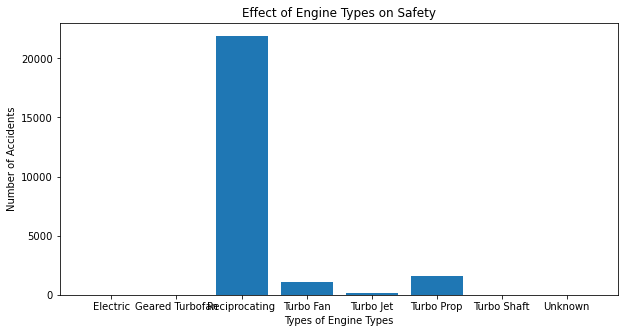

In [50]:
x = df_clean_aircraft['Engine.Type'].value_counts().sort_index().index
y = df_clean_aircraft['Engine.Type'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of Engine Types on Safety')
ax.set_xlabel('Types of Engine Types')
ax.set_ylabel('Number of Accidents');

Highest no of accidents occured for flights with the engine type of reciprocating. At high level we could conclude to avoid engine type reciprocating. Look for flights with Turbo engine type.

**Analysis of Weather Condition**

In [51]:
df_clean_aircraft['Weather.Condition'].value_counts()

VMC    24449
IMC     1575
Unk      222
UNK        1
Name: Weather.Condition, dtype: int64

There are two types of unknow to bring down to common category

In [52]:
df_clean_aircraft['Weather.Condition'].replace(to_replace='Unk', value='UNK', regex=True, inplace = True)

In [53]:
df_clean_aircraft['Weather.Condition'].value_counts()

VMC    24449
IMC     1575
UNK      223
Name: Weather.Condition, dtype: int64

As above table suggest higher no of accidents with Visual Meteorological conditions. This may be due to VMC is more popular feature than IMC. Our online research suggest that VMC is a better than IMC for flight safety where Aircraft flying in VMC generally have more flexibility in terms of flight routes and altitudes, while those flying in IMC must follow specific instrument procedures and communicate closely with air traffic control to ensure separation from other aircraft. In order to conclude on this we would require more information like production of aircrafts with VMC and IMC to consider proportions.

As per online readings it is opt to look for models with Visual Meteorological conditions(VMC).

**Analysis of Weather Condition against Types of Injuries**

<AxesSubplot:xlabel='Weather.Condition', ylabel='Total Survived'>

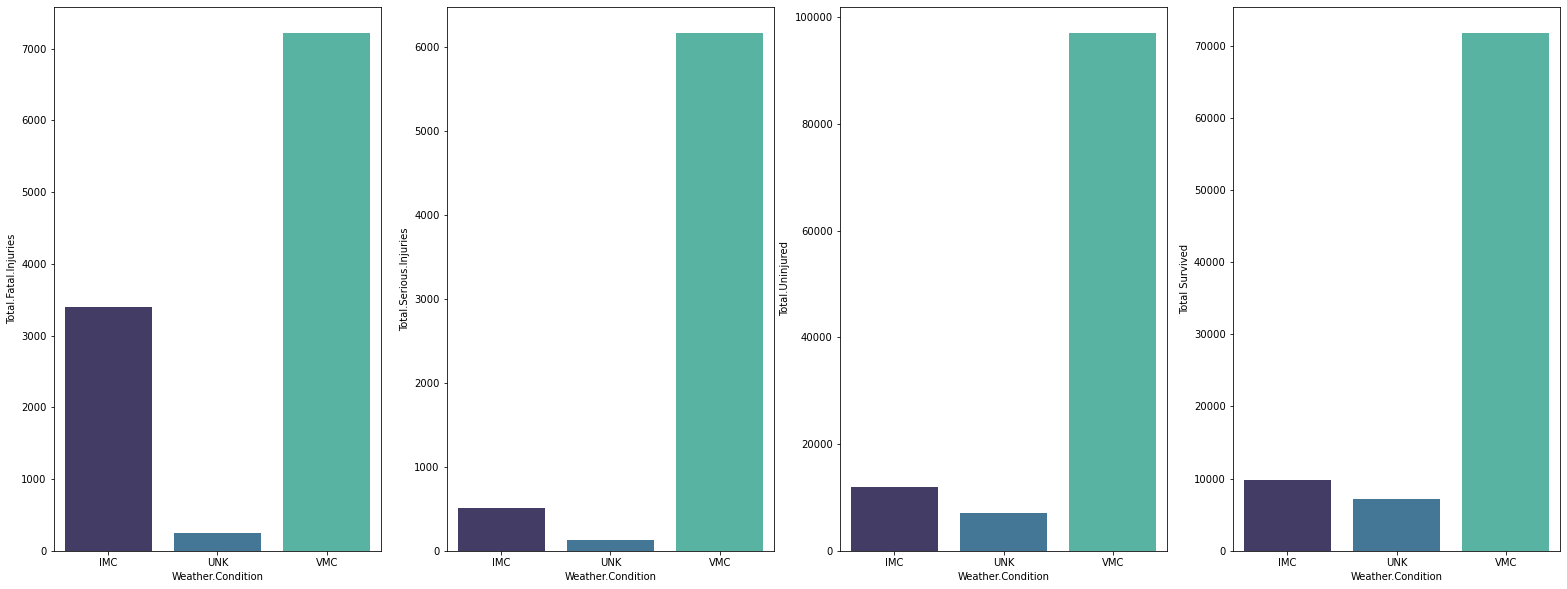

In [54]:
factor_weather= df_clean_aircraft.groupby("Weather.Condition").sum().reset_index()

f, axes=plt.subplots(1,4 , figsize= (27,10))
sns.barplot(x = 'Weather.Condition',y='Total.Fatal.Injuries' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[0])
sns.barplot(x = 'Weather.Condition',y='Total.Serious.Injuries' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[1])
sns.barplot(x = 'Weather.Condition',y='Total.Uninjured' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[2])
sns.barplot(x = 'Weather.Condition',y='Total Survived' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[3])

In all the scenarios no of passengers survived and injuried are high with the VMC. Therefore by using the above graphs cannot clearly conclude the outcome. As mentioned earlier need to look for proportions and will be required more information.
As online research suggested will be going with VMC as it has more flexibility towards safety of the flight.

**Analysis of Different Types of Injuries**

Check for summary of injuries based on model_make and injury type

In [55]:
df_clean_aircraft.groupby(['Make_Model'])['Total.Uninjured'].mean().sort_values(ascending = False).head(10)

Make_Model
MCDONALD DOUGLAS MD 83    501.0
BOEING 777-2Q8            403.0
AIRBUS A340 - 300         397.0
BOEING 747-451            394.0
BOEING 747 - 400          383.0
BOEING 777 222            378.0
AIRBUS A330 - 301         365.0
BOEING 757-351            352.0
BOEING 747 451            326.0
BOEING 777-300            311.0
Name: Total.Uninjured, dtype: float64

In [56]:
df_clean_aircraft.groupby(['Make_Model'])['Total.Fatal.Injuries'].mean().sort_values(ascending = False).head(10)

Make_Model
BOEING 777 - 206       178.00
AIRBUS A320 - 216      162.00
EMBRAER E135 Legacy    154.00
AIRBUS A310            152.00
BOEING 727-223         141.00
BOEING 767-200ER       138.00
BOEING 747-200         103.00
AIRBUS A320-233        101.00
BOEING MD-82           100.75
BOEING 737-200          80.50
Name: Total.Fatal.Injuries, dtype: float64

In [57]:
df_clean_aircraft.groupby(['Make_Model'])['Total.Serious.Injuries'].mean().sort_values(ascending = False).head(10)

Make_Model
BOEING 777-200ER          137.000000
BOEING 737-4Q8             88.000000
FOKKER F28-4000            63.000000
BOEING B737-400            50.000000
BOEING 767-200ER           28.000000
AIRBUS A320 - 211          28.000000
BOEING 727-223             25.000000
BOMBARDIER CL-600-2D24     22.000000
BOEING 737-200             21.666667
BOEING 737-524             20.500000
Name: Total.Serious.Injuries, dtype: float64

In [58]:
df_clean_aircraft.groupby(['Make_Model'])['Total.Minor.Injuries'].mean().sort_values(ascending = False).head(10)

Make_Model
BOEING 777-200ER            50.000000
MCDONALD DOUGLAS MD-82      22.500000
ATR 72                      16.500000
MCDONALD DOUGLAS DC-9-51    15.666667
MCDONALD DOUGLAS MD-11      11.000000
FOKKER 100                  11.000000
BOEING B737-800              9.666667
BOEING MD-82                 9.000000
BOMBARDIER CL-600-1A11       9.000000
MCDONALD DOUGLAS MD-80       8.000000
Name: Total.Minor.Injuries, dtype: float64

In [59]:
df_clean_aircraft.groupby(['Make'])['Total Survived'].mean().sort_values(ascending = False).head(10)

Make
737                              164.500000
AIRBUS                            82.739437
BOEING                            70.724806
EMBRAER-EMPRESA BRASILEIRA DE     70.500000
MCDONALD DOUGLAS                  68.202247
BOMBARDIER, INC.                  43.285714
EMBRAER S.A.                      39.000000
BOMBARDIER INC                    37.558824
EMBRAER S A                       31.333333
SAAB-SCANIA                       31.000000
Name: Total Survived, dtype: float64

In [60]:
df_clean_aircraft['Make'].replace(to_replace='737', value = 'BOEING', inplace = True)

In [61]:
df_clean_aircraft.groupby(['Make_Model'])['Total Survived'].mean().sort_values(ascending = False).head(25)

Make_Model
BOEING 777-2Q8            403.000000
AIRBUS A340 - 300         397.000000
BOEING 747-451            394.000000
BOEING 747 - 400          383.000000
BOEING 777 222            378.000000
AIRBUS A330 - 301         365.000000
BOEING 757-351            352.000000
BOEING 747-200            340.000000
BOEING 747 451            326.000000
BOEING 777-300            311.000000
BOEING 777-200ER          304.000000
BOEING 747 - 468          300.000000
BOEING 737-732            288.500000
BOEING 747-422            285.500000
BOEING 777-232            279.000000
AIRBUS A380               274.500000
BOEING 767-300            256.000000
BOEING 747-400            252.555556
MCDONALD DOUGLAS MD-11    245.000000
AIRBUS A330-323           233.500000
BOEING 767-3P6            232.000000
BOEING 767 332            226.000000
BOEING 737-900            221.000000
BOEING 767 33A            217.000000
BOEING 777 - 212          217.000000
Name: Total Survived, dtype: float64

By observing above table can say that mostly Airbus and BOEING airplane models shows higher mean number of  passenger survived after an accident. Again this could be bias based on the aircraft capacity.

**Conclusion**

Considering the safety aspect of the analysis it is recommended to purchse either BOEING or AIRBUS. As the business is just getting to airline business it is recommended to purchase BOEING based on the size of the business. If the company is up for higher investment could look for AIRBUS as well.

When selecting models needs to check for no of engines as 2 with weather condition monitor of Visual Meteorological conditions(VMC) and avoid reciprocating type engine airplanes.

As per the online research it is recommended to purchase BOEIN 737 as private airplane and BOEING 777 as the commercial flight.

In [62]:
df_clean_aircraft.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      6
Country                       2
Latitude                   2788
Longitude                  2797
Airport.Code              10355
Airport.Name              10209
Injury.Severity             901
Aircraft.damage            1568
Aircraft.Category             0
Registration.Number         484
Make                          0
Model                        24
Amateur.Built                58
Number.of.Engines          3350
Engine.Type                4945
FAR.Description            6000
Schedule                  26634
Purpose.of.flight          4565
Air.carrier               18349
Total.Fatal.Injuries       6901
Total.Serious.Injuries     7495
Total.Minor.Injuries       7012
Total.Uninjured            3104
Weather.Condition          3517
Broad.phase.of.flight     21802
Report.Status              5271
Publication.Date           2167
Make_Mod

In [63]:
df_clean_aircraft['Total.Fatal.Injuries'] = df_clean_aircraft['Total.Fatal.Injuries'].fillna(0)

In [64]:
df_clean_aircraft['Total.Serious.Injuries'] = df_clean_aircraft['Total.Serious.Injuries'].fillna(0)

In [65]:
df_clean_aircraft['Total.Minor.Injuries'] = df_clean_aircraft['Total.Minor.Injuries'].fillna(0)

In [66]:
df_clean_aircraft['Total.Uninjured'] = df_clean_aircraft['Total.Uninjured'].fillna(0)

In [67]:
df_clean_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29764 entries, 51959 to 90347
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                29764 non-null  object        
 1   Investigation.Type      29764 non-null  object        
 2   Accident.Number         29764 non-null  object        
 3   Event.Date              29764 non-null  object        
 4   Location                29758 non-null  object        
 5   Country                 29762 non-null  object        
 6   Latitude                26976 non-null  object        
 7   Longitude               26967 non-null  object        
 8   Airport.Code            19409 non-null  object        
 9   Airport.Name            19555 non-null  object        
 10  Injury.Severity         28863 non-null  object        
 11  Aircraft.damage         28196 non-null  object        
 12  Aircraft.Category       29764 non-null  ob

In [68]:
df_clean_aircraft['Total_Injuries'] = (
    df_clean_aircraft['Total.Serious.Injuries'] +
    df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Fatal.Injuries']
)


In [69]:
df_aircraft_survival = df_clean_aircraft.groupby('Make_Model').agg({
    'Total_Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Total.Fatal.Injuries': 'sum'
})
df_aircraft_survival['Survival_Rate'] = df_aircraft_survival['Total.Uninjured'] / (
    df_aircraft_survival['Total_Injuries'] + df_aircraft_survival['Total.Uninjured']+df_aircraft_survival['Total.Fatal.Injuries'])

In [70]:
df_aircraft_survival.sort_values(by ='Survival_Rate', ascending = False ).head()

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survival_Rate
Make_Model,,,,
ZWICKER MURRAY R GLASTAR,0.0,2.0,0.0,1.0
DIAMOND DA 40,0.0,7.0,0.0,1.0
DONHAM TIMOTHY J RV 6A,0.0,2.0,0.0,1.0
RALPH C KIMBALL Sea Rey,0.0,2.0,0.0,1.0
RAINBOW SKY REACH Bushcat,0.0,2.0,0.0,1.0


In [71]:
df_aircraft_survival['Total_Passengers'] = df_aircraft_survival['Total_Injuries'] + df_aircraft_survival['Total.Uninjured']+df_aircraft_survival['Total.Fatal.Injuries'] 

In [72]:
df_aircraft_survival.head()

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survival_Rate,Total_Passengers
Make_Model,,,,,
177MF LLC PITTS MODEL 12,2.0,0.0,0.0,0.0,2.0
2007 SAVAGE AIR LLC EPIC LT,0.0,4.0,0.0,1.0,4.0
2021FX3 LLC CCX-2000,0.0,4.0,0.0,1.0,4.0
3XTRIM 450 ULTRA,2.0,0.0,1.0,0.0,3.0
5 RIVERS LLC SQ-2,1.0,1.0,0.0,0.5,2.0


In [76]:
Private_Plane = df_aircraft_survival.loc[(df_aircraft_survival['Total_Passengers']>10) & (df_aircraft_survival['Total_Passengers']<30)]

In [77]:
Private_Plane.loc[Private_Plane['Total_Injuries']>0].sort_values(by = 'Survival_Rate', ascending = False).head(10)

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survival_Rate,Total_Passengers
Make_Model,,,,,
MAULE M-5-210C,1.0,26.0,0.0,0.962963,27.0
EMBRAER 140,1.0,24.0,0.0,0.960000,25.0
FAIRCHILD Dornier 328-300,1.0,23.0,0.0,0.958333,24.0
CESSNA T188C,1.0,20.0,0.0,0.952381,21.0
MCDONALD DOUGLAS DC-9-87,1.0,20.0,0.0,0.952381,21.0
GULFSTREAM G IV,1.0,20.0,0.0,0.952381,21.0
GREAT LAKES 2T-1A-2,1.0,18.0,0.0,0.947368,19.0
DORNIER 328,1.0,15.0,0.0,0.937500,16.0
HELIO H 295,1.0,14.0,0.0,0.933333,15.0


In [78]:
Private_Plane['injury_ratio'] = (Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])/Private_Plane['Total.Uninjured']

<ipython-input-78-8e4d07874882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Private_Plane['injury_ratio'] = (Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])/Private_Plane['Total.Uninjured']


In [81]:
Private_Plane.loc[Private_Plane['Total_Injuries']>0].sort_values(by =['Survival_Rate','injury_ratio'],ascending =[True,True])

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survival_Rate,Total_Passengers,injury_ratio
Make_Model,,,,,,
AERO COMMANDER 840,7.0,0.0,7.0,0.000000,14.0,inf
AIRVAN GA8,9.0,0.0,9.0,0.000000,18.0,inf
BEECH 60,10.0,0.0,8.0,0.000000,18.0,inf
BEECH A24R,9.0,0.0,2.0,0.000000,11.0,inf
BEECH BE-100,6.0,0.0,6.0,0.000000,12.0,inf
BEECH BE-60,7.0,0.0,6.0,0.000000,13.0,inf
BEECH C90B,11.0,0.0,7.0,0.000000,18.0,inf
BELL P63,6.0,0.0,6.0,0.000000,12.0,inf
BOEING 747-400 BCF,7.0,0.0,7.0,0.000000,14.0,inf


In [298]:
Commercial_Plane = df_aircraft_survival.loc[(df_aircraft_survival['Total_Survived']>75) & (df_aircraft_survival['Total_Survived']<200)]

In [302]:
Commercial_Plane

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survival_Rate,Total_Survived,Total_Passengers
Make_Model,,,,,,
AERONCA 7AC,64.0,87.0,16.0,0.520958,167.0,167.0
AIRBUS 319,11.0,155.0,0.0,0.933735,166.0,166.0
AIRBUS 319-132,1.0,119.0,0.0,0.991667,120.0,120.0
AIRBUS 321,0.0,192.0,0.0,1.000000,192.0,192.0
AIRBUS A319 - 132,35.0,95.0,0.0,0.730769,130.0,130.0
AIRBUS A319 112,2.0,139.0,0.0,0.985816,141.0,141.0
AIRBUS A319 114,1.0,120.0,0.0,0.991736,121.0,121.0
AIRBUS A319-100,3.0,114.0,0.0,0.974359,117.0,117.0
AIRBUS A320 - 211,28.0,110.0,0.0,0.797101,138.0,138.0


In [236]:
s = pd.Series(df_aircraft_survival['Total_Survived'])
Private_Planes = s.map((df_aircraft_survival['Total_Survived']>10) &(df_aircraft_survival['Total_Survived']<30)) 

In [ ]:
df = pd.DataFrame(data, columns = ['Products'])

In [223]:
df_aircraft_survival_Private = df_aircraft_survival.map((df_aircraft_survival_sorted['Total_Injuries'] + df_aircraft_survival_sorted['Total.Uninjured'] > 10) &
    (df_aircraft_survival_sorted['Total_Injuries'] + df_aircraft_survival_sorted['Total.Uninjured'] < 30))

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
df_aircraft_survival[]